In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv("data/aviation_final.csv")
df

,Unnamed: 0,investigation_type,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,year,state
0,0,Accident,"TUCSON, AZ",United States,fatal,Destroyed,Unknown,Beech,95,2,Reciprocating,Personal,1,3,0,0,VMC,Takeoff,2003,AZ
1,1,Accident,"Milford, UT",United States,non-fatal,Destroyed,Unknown,Aircraft Mfg & Dev. Co. (Amd),Ch2000,1,Reciprocating,Instructional,0,2,0,0,VMC,Cruise,2003,UT
2,2,Accident,"IDAHO FALLS, ID",United States,non-fatal,Substantial,Unknown,Bell,47G,1,Turbo Shaft,Other Work Use,0,0,0,1,VMC,Cruise,2003,ID
3,3,Accident,"NEW PORT RICHEY, FL",United States,non-fatal,Substantial,Unknown,Hughes,Oh6,1,Turbo Shaft,Public Aircraft,0,0,0,2,VMC,Takeoff,2003,FL
4,4,Accident,"Shreveport, LA",United States,fatal,Destroyed,Unknown,Grumman American,Aa1A,1,Reciprocating,Personal,2,0,0,0,VMC,Takeoff,2003,LA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26978,26978,Accident,"Annapolis, MD",United States,non-fatal,Unknown,Unknown,Piper,Pa28151,0,Unknown,Personal,0,1,0,0,Unknown,Unknown,2022,MD
26979,26979,Accident,"Hampton, NH",United States,non-fatal,Unknown,Unknown,Bellanca,7Eca,0,Unknown,Unknown,0,0,0,0,Unknown,Unknown,2022,NH
26980,26980,Accident,"Payson, AZ",United States,non-fatal,Substantial,Airplane,American Champion Aircraft,8Gcbc,1,Unknown,Personal,0,0,0,1,VMC,Unknown,2022,AZ
26981,26981,Accident,"Morgan, UT",United States,non-fatal,Unknown,Unknown,Cessna,210N,0,Unknown,Personal,0,0,0,0,Unknown,Unknown,2022,UT


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26983 entries, 0 to 26982
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              26983 non-null  int64 
 1   investigation_type      26983 non-null  object
 2   location                26983 non-null  object
 3   country                 26983 non-null  object
 4   injury_severity         26983 non-null  object
 5   aircraft_damage         26983 non-null  object
 6   aircraft_category       26983 non-null  object
 7   make                    26983 non-null  object
 8   model                   26983 non-null  object
 9   number_of_engines       26983 non-null  int64 
 10  engine_type             26983 non-null  object
 11  purpose_of_flight       26983 non-null  object
 12  total_fatal_injuries    26983 non-null  int64 
 13  total_serious_injuries  26983 non-null  int64 
 14  total_minor_injuries    26983 non-null  int64 
 15  to

Switch event_date to datetime 

In [10]:
df['event_date'] = pd.to_datetime(df['event_date'])

KeyError: 'event_date'

In [ ]:
df = df.drop(['injury_severity','Unnamed: 0'],axis =1)

In [ ]:
df = df[df['year'] >= 2003]

In [ ]:
df.info()

In [ ]:
df['total_fatal_injuries'] = pd.to_numeric(df['total_fatal_injuries'])
df['total_serious_injuries'] = pd.to_numeric(df['total_serious_injuries'])
df['total_minor_injuries'] = pd.to_numeric(df['total_minor_injuries'])

grouped_data = df.groupby('make').agg({
    'total_fatal_injuries': 'sum',
    'total_serious_injuries': 'sum',
    'total_minor_injuries': 'sum'
})

grouped_data['total_injuries'] = grouped_data['total_fatal_injuries'] + grouped_data['total_serious_injuries'] + grouped_data['total_minor_injuries']

top_makes = grouped_data.nlargest(30, 'total_injuries')

print(top_makes)

In [ ]:
df = df[df['weather_condition'] != 'Unknown']

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Group by 'make' and 'weather_type' and calculate total injuries
grouped_data = df.groupby(['make', 'weather_condition']).agg({
    'total_fatal_injuries': 'sum',
    'total_serious_injuries': 'sum',
    'total_minor_injuries': 'sum'
})
grouped_data['total_injuries'] = grouped_data['total_fatal_injuries'] + grouped_data['total_serious_injuries'] + grouped_data['total_minor_injuries']

# Get the top makes with highest total injuries
top_makes = grouped_data.nlargest(10, 'total_injuries')

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
top_makes[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Aircraft Make and Weather Type', fontsize=12)
ax.set_ylabel('Total Injuries', fontsize=12)
ax.set_title('Highest Total Injuries by Aircraft Make and Weather Type', fontsize=14)

# Update x-axis labels to include weather type
ax.set_xticklabels([f"{make}\n{weather_type}" for make, weather_type in top_makes.index])

# Show the plot
plt.show()

In [ ]:
df['weather_condition'].value_counts()

In [46]:

model_counts = df.groupby(['make', 'model']).size().reset_index(name='count')

top_100_models = model_counts.sort_values(by='count', ascending=False).head(100)


In [51]:
model_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598 entries, 0 to 3597
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   make    3598 non-null   object
 1   model   3598 non-null   object
 2   count   3598 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 84.5+ KB


Focusing on these Four columns to determine the safest aircraft

In [41]:
data = df
data = data[['make','model','aircraft_category','number_of_engines','aircraft_damage','weather_condition']]
data

,make,model,aircraft_category,number_of_engines,aircraft_damage,weather_condition
0,Beech,95,Unknown,2,Destroyed,VMC
1,Bell,47G,Unknown,1,Substantial,VMC
2,Hughes,Oh6,Unknown,1,Substantial,VMC
3,Grumman American,Aa1A,Unknown,1,Destroyed,VMC
4,Cessna,150K,Unknown,1,Substantial,VMC
...,...,...,...,...,...,...
18470,Cessna,172F,Unknown,0,Unknown,Unknown
18471,Piper,Pa28151,Unknown,0,Unknown,Unknown
18472,American Champion Aircraft,8Gcbc,Airplane,1,Substantial,VMC
18473,Cessna,210N,Unknown,0,Unknown,Unknown


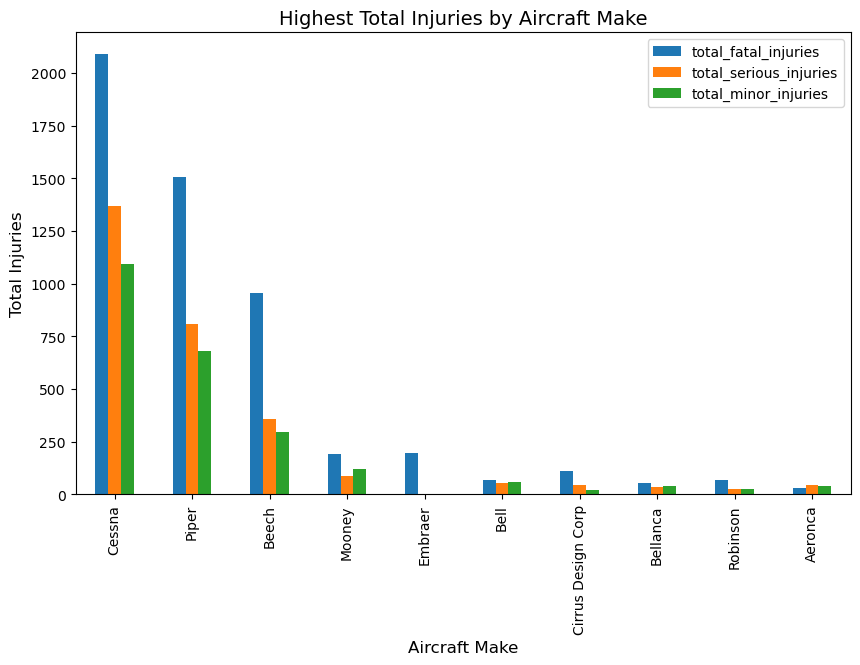

In [55]:

df['total_fatal_injuries'] = pd.to_numeric(df['total_fatal_injuries'])
df['total_serious_injuries'] = pd.to_numeric(df['total_serious_injuries'])
df['total_minor_injuries'] = pd.to_numeric(df['total_minor_injuries'])

grouped_data = df.groupby('make').agg({
    'total_fatal_injuries': 'sum',
    'total_serious_injuries': 'sum',
    'total_minor_injuries': 'sum'
})

grouped_data['total_injuries'] = grouped_data['total_fatal_injuries'] + grouped_data['total_serious_injuries'] + grouped_data['total_minor_injuries']

top_makes = grouped_data.nlargest(10, 'total_injuries')

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
top_makes[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Aircraft Make', fontsize=12)
ax.set_ylabel('Total Injuries', fontsize=12)
ax.set_title('Highest Total Injuries by Aircraft Make', fontsize=14)

# Show the plot
plt.show()

In [54]:
top_make

,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_injuries
make,,,,
Cessna,2088,1368,1096,4552
Piper,1507,808,682,2997
Beech,957,356,298,1611
Mooney,192,90,119,401
Embraer,195,2,3,200
...,...,...,...,...
Casa,8,0,2,10
Eurocopter Deutschland,9,1,0,10
Extra Flugzeugbau Gmbh,6,2,2,10


In [ ]:
list(df['make'].unique())

In [ ]:
df.info()

In [ ]:
df['event_date'] = pd.to_datetime(df['event_date'], format='%Y-%m-%d')


df['month'] = df['event_date'].dt.month
df['day'] = df['event_date'].dt.day
df

In [ ]:
df = df[df['amateur_built']!='Yes']

In [ ]:
mask = df['amateur_built'] == 'yes'
any_yes_rows = mask.any()
print(any_yes_rows)

In [ ]:
print(df.columns)

In [ ]:
df.info()

In [ ]:
df['country'].value_counts()

In [ ]:
df = df[df['country'] == 'United States']
df.info()

In [ ]:
list(df['purpose_of_flight'].unique())

In [ ]:
df['purpose_of_flights'] = df['purpose_of_flight'].str.replace('Public Aircraft - Federal','Public Aircraft', regex = True)

In [ ]:
df['purpose_of_flights'] = df['purpose_of_flight'].str.replace('Public Aircraft - Local','Public Aircraft', regex = True)

In [ ]:
df['purpose_of_flights'] = df['purpose_of_flight'].str.replace('Public Aircraft - State','Public Aircraft', regex = True)

In [ ]:
list(df['purpose_of_flight'].unique())

In [ ]:
list(df['investigation_type'].unique())

In [ ]:

df[(df['report_status'].str.contains('student', case=False)) & (df['purpose_of_flight'] == 'Instructional')]
 

In [ ]:
grouped_df = df.groupby(['engine_type','model','make']).size().reset_index(name='count')

In [ ]:

# df['make'] = df['make'].str.replace('UNIVERSAL UNIVERSAL STINSON', 'UNIVERSAL STINSON', regex=True, case=False)

df['make'] = df['make'].str.replace('Stinson', 'UNIVERSAL STINSON', regex=True, case=False)

# df['make'] = df['make'].str.replace('UNIVERSAL UNIVERSAL STINSON', 'UNIVERSAL STINSON', regex=True, case=False)




In [ ]:
grouped_df[grouped_df['engine_type'] == 'Electric']

In [ ]:
grouped_df[grouped_df['engine_type'] == 'Turbo Fan']

In [11]:
grouped_df.head(50)

NameError: name 'grouped_df' is not defined

In [ ]:
unique_models = df['engine_type'].unique()
list(unique_models)

In [12]:
df['purpose_of_flight'].value_counts()

purpose_of_flight
Personal                     14460
Unknown                       5145
Instructional                 3363
Aerial Application            1179
Business                       713
Positioning                    532
Other Work Use                 283
Aerial Observation             217
Flight Test                    167
Ferry                          144
Executive/corporate            139
Skydiving                      135
Public Aircraft                109
Banner Tow                     101
Public Aircraft - Federal       74
Air Race show                   49
Glider Tow                      42
Public Aircraft - State         33
Air Race/show                   25
Firefighting                    23
Public Aircraft - Local         20
External Load                   18
ASHO                             5
Air Drop                         4
PUBS                             3
Name: count, dtype: int64

In [13]:
df['purpose_of_flight'] = df['purpose_of_flight'].str.replace('Air Race show','Air Race Show').str.replace('Air Race/show','Air Race Show')

In [14]:
df = df[~(df['purpose_of_flight'] =='Instructional')]

In [15]:
df['purpose_of_flight'] = df['purpose_of_flight'].str.replace('Public Aircraft - Federal','Public Aircraft ').str.replace('Public Aircraft - Local','Public Aircraft').str.replace('Public Aircraft - State','Public Aircraft')

/var/folders/0k/vkk0n9xx3zd6b7k7s4cdg07h0000gn/T/ipykernel_19802/960499334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['purpose_of_flight'] = df['purpose_of_flight'].str.replace('Public Aircraft - Federal','Public Aircraft ').str.replace('Public Aircraft - Local','Public Aircraft').str.replace('Public Aircraft - State','Public Aircraft')


In [16]:
df['purpose_of_flight'].value_counts()

purpose_of_flight
Personal               14460
Unknown                 5145
Aerial Application      1179
Business                 713
Positioning              532
Other Work Use           283
Aerial Observation       217
Flight Test              167
Public Aircraft          162
Ferry                    144
Executive/corporate      139
Skydiving                135
Banner Tow               101
Air Race Show             74
Public Aircraft           74
Glider Tow                42
Firefighting              23
External Load             18
ASHO                       5
Air Drop                   4
PUBS                       3
Name: count, dtype: int64

In [17]:
len(df['purpose_of_flight'].value_counts())

21

In [18]:
df = df[df['purpose_of_flight'] != 'Unknown']
df

,Unnamed: 0,investigation_type,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,year,state
0,0,Accident,"TUCSON, AZ",United States,fatal,Destroyed,Unknown,Beech,95,2,Reciprocating,Personal,1,3,0,0,VMC,Takeoff,2003,AZ
2,2,Accident,"IDAHO FALLS, ID",United States,non-fatal,Substantial,Unknown,Bell,47G,1,Turbo Shaft,Other Work Use,0,0,0,1,VMC,Cruise,2003,ID
3,3,Accident,"NEW PORT RICHEY, FL",United States,non-fatal,Substantial,Unknown,Hughes,Oh6,1,Turbo Shaft,Public Aircraft,0,0,0,2,VMC,Takeoff,2003,FL
4,4,Accident,"Shreveport, LA",United States,fatal,Destroyed,Unknown,Grumman American,Aa1A,1,Reciprocating,Personal,2,0,0,0,VMC,Takeoff,2003,LA
5,5,Accident,"JESSUP, GA",United States,non-fatal,Substantial,Unknown,Cessna,150K,1,Reciprocating,Personal,0,0,0,1,VMC,Cruise,2003,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26975,26975,Accident,"Auburn Hills, MI",United States,non-fatal,Unknown,Unknown,Cessna,172F,0,Unknown,Personal,0,1,0,0,Unknown,Unknown,2022,MI
26978,26978,Accident,"Annapolis, MD",United States,non-fatal,Unknown,Unknown,Piper,Pa28151,0,Unknown,Personal,0,1,0,0,Unknown,Unknown,2022,MD
26980,26980,Accident,"Payson, AZ",United States,non-fatal,Substantial,Airplane,American Champion Aircraft,8Gcbc,1,Unknown,Personal,0,0,0,1,VMC,Unknown,2022,AZ
26981,26981,Accident,"Morgan, UT",United States,non-fatal,Unknown,Unknown,Cessna,210N,0,Unknown,Personal,0,0,0,0,Unknown,Unknown,2022,UT


In [19]:
df.duplicated().sum()

0

In [20]:
df['country'].value_counts()

country
United States       17720
Brazil                 86
Mexico                 53
Canada                 51
France                 44
                    ...  
Czech Republic          1
Macao                   1
Saint Barthelemy        1
Thailand                1
Cuba                    1
Name: count, Length: 97, dtype: int64

In [21]:
#rate of incidents in 1982 and 2022 respectively 
accidents_df = df[df['investigation_type'] == 'accident']

accidents_1982 = len(accidents_df[(accidents_df['event_date'] >= '1982-01-01') & (accidents_df['event_date'] <= '1982-12-31')])

accidents_2022 = len(accidents_df[(accidents_df['event_date'] >= '2022-01-01') & (accidents_df['event_date'] <= '2022-12-31')])

days_1982 = (pd.to_datetime('1983-01-01') - pd.to_datetime('1982-01-01')).days
rate_1982 = accidents_1982 / days_1982

days_2022 = (pd.to_datetime('2023-01-01') - pd.to_datetime('2022-01-01')).days
rate_2022 = accidents_2022 / days_2022

print(rate_1982)
print(rate_2022)

KeyError: 'event_date'

In [22]:
df.to_csv('cleaned_data.csv', index=False)
df

,Unnamed: 0,investigation_type,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,year,state
0,0,Accident,"TUCSON, AZ",United States,fatal,Destroyed,Unknown,Beech,95,2,Reciprocating,Personal,1,3,0,0,VMC,Takeoff,2003,AZ
2,2,Accident,"IDAHO FALLS, ID",United States,non-fatal,Substantial,Unknown,Bell,47G,1,Turbo Shaft,Other Work Use,0,0,0,1,VMC,Cruise,2003,ID
3,3,Accident,"NEW PORT RICHEY, FL",United States,non-fatal,Substantial,Unknown,Hughes,Oh6,1,Turbo Shaft,Public Aircraft,0,0,0,2,VMC,Takeoff,2003,FL
4,4,Accident,"Shreveport, LA",United States,fatal,Destroyed,Unknown,Grumman American,Aa1A,1,Reciprocating,Personal,2,0,0,0,VMC,Takeoff,2003,LA
5,5,Accident,"JESSUP, GA",United States,non-fatal,Substantial,Unknown,Cessna,150K,1,Reciprocating,Personal,0,0,0,1,VMC,Cruise,2003,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26975,26975,Accident,"Auburn Hills, MI",United States,non-fatal,Unknown,Unknown,Cessna,172F,0,Unknown,Personal,0,1,0,0,Unknown,Unknown,2022,MI
26978,26978,Accident,"Annapolis, MD",United States,non-fatal,Unknown,Unknown,Piper,Pa28151,0,Unknown,Personal,0,1,0,0,Unknown,Unknown,2022,MD
26980,26980,Accident,"Payson, AZ",United States,non-fatal,Substantial,Airplane,American Champion Aircraft,8Gcbc,1,Unknown,Personal,0,0,0,1,VMC,Unknown,2022,AZ
26981,26981,Accident,"Morgan, UT",United States,non-fatal,Unknown,Unknown,Cessna,210N,0,Unknown,Personal,0,0,0,0,Unknown,Unknown,2022,UT


In [23]:
df = df.dropna(subset=['location'])
df = df.reset_index(drop = True)

In [24]:
df.duplicated().sum()

0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18475 entries, 0 to 18474
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              18475 non-null  int64 
 1   investigation_type      18475 non-null  object
 2   location                18475 non-null  object
 3   country                 18475 non-null  object
 4   injury_severity         18475 non-null  object
 5   aircraft_damage         18475 non-null  object
 6   aircraft_category       18475 non-null  object
 7   make                    18475 non-null  object
 8   model                   18475 non-null  object
 9   number_of_engines       18475 non-null  int64 
 10  engine_type             18475 non-null  object
 11  purpose_of_flight       18475 non-null  object
 12  total_fatal_injuries    18475 non-null  int64 
 13  total_serious_injuries  18475 non-null  int64 
 14  total_minor_injuries    18475 non-null  int64 
 15  to

In [26]:
df['investigation_type'] == 'accident'

0        False
1        False
2        False
3        False
4        False
         ...  
18470    False
18471    False
18472    False
18473    False
18474    False
Name: investigation_type, Length: 18475, dtype: bool

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18475 entries, 0 to 18474
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              18475 non-null  int64 
 1   investigation_type      18475 non-null  object
 2   location                18475 non-null  object
 3   country                 18475 non-null  object
 4   injury_severity         18475 non-null  object
 5   aircraft_damage         18475 non-null  object
 6   aircraft_category       18475 non-null  object
 7   make                    18475 non-null  object
 8   model                   18475 non-null  object
 9   number_of_engines       18475 non-null  int64 
 10  engine_type             18475 non-null  object
 11  purpose_of_flight       18475 non-null  object
 12  total_fatal_injuries    18475 non-null  int64 
 13  total_serious_injuries  18475 non-null  int64 
 14  total_minor_injuries    18475 non-null  int64 
 15  to

In [28]:
df['report_status'].unique()

KeyError: 'report_status'

In [ ]:
df['number_of_engines'] = df['number_of_engines'].replace('Unknown',0)

In [ ]:
df['purpose_of_flight'].value_counts()

In [ ]:
df['engine_type'].value_counts()

In [ ]:
df['city'] = df['location'].str.split(',').str[0]
df['state'] = df['location'].str.split(',').str[1]
df[['city', 'state']].head(10)

In [ ]:
grouped_cities = df.groupby('city')
grouped_cities

In [ ]:
city_counts = grouped_cities.size()
city_counts.value_counts()

In [ ]:
table = df.loc[(df['investigation_type'] == 'accident') & (df['report_status'] == 'The pilotÂ\x92s loss of control due to a wind gust during landing.')]
print(table)

In [ ]:
print("Unique investigation types:", df['investigation_type'].unique())
print("Unique report statuses:", df['report_status'].unique())
print("Unique weather conditions:", df['weather_condition'].unique())

Focusing on these catagories to find the safest aircraft 

In [ ]:
data = df
data = data[['make','model','engine_type','aircraft_damage','purpose_of_flights','air_carrier','total_fatal_injuries','total_serious_injuries','total_minor_injuries','broad_phase_of_flight','year']]
data.info()

In [ ]:
df['air_carrier'].unique()

In [29]:

grouped_data = data.groupby(['make', 'engine_type'])

for (make, engine_type), group in grouped_data:
    unique_engine_types = group['engine_type'].unique()
    print("Make:", make)
    print("Unique Engine Types:", unique_engine_types)
    print()

NameError: name 'data' is not defined

In [30]:
grouped_data = data.groupby('make').size().reset_index(name='average_accidents')
grouped_data

NameError: name 'data' is not defined

In [ ]:
total_aircraft = data['make'].value_counts().reset_index()
total_aircraft.columns = ['make','total_aircraft']

In [31]:
merged_data = pd.merge(grouped_data, total_aircraft, on='make')
merged_data

NameError: name 'grouped_data' is not defined

In [ ]:
merged_data['risk_score'] = merged_data['average_accidents']/merged_data['total_aircraft']

In [ ]:
sorted_data = merged_data.sort_values('risk_score')
print(sorted_data[['make','risk_score']])

In [32]:
most_frequent_make = sorted_data['make'].mode().values[:10]
most_frequent_make

NameError: name 'sorted_data' is not defined

In [ ]:

frequent_makes = ['177Mf Llc', '2021Fx3 Llc', 'Ab Sportine Aviacija', 'Adams','Adams Balloon', 'Adams Dennis Allen', 'Adventura',
       'Aerial Productions Intl. Inc.', 'Aermacchi', 'Aero Adventure']  # Replace with the most frequent make(s) you obtained earlier
filtered_data = sorted_data[sorted_data['make'].isin(frequent_makes)]

risk_scores = filtered_data['risk_score']

print("Risk Score(s) for Frequent Makes:")
for make, risk_score in zip(frequent_makes, risk_scores):
    print(make, ":", risk_score)


In [33]:
zero_risk_makes = sorted_data[sorted_data['risk_score'] == 0]['make']
for make in zero_risk_makes:
    print(make)
make

NameError: name 'sorted_data' is not defined

In [ ]:

if len(zero_risk_makes) > 1:
    print("There is more than one make with a risk score of 0.")
else:
    print("There is only one make with a risk score of 0.")

In [34]:
high_risk_makes = sorted_data[sorted_data['risk_score']>1]['make']
for make in high_risk_makes:
    print(make)
make

NameError: name 'sorted_data' is not defined

In [35]:
merged_data = data.merge(sorted_data[['make','risk_score']], on='make',how='left')
merged_data

NameError: name 'data' is not defined

In [ ]:
merged_data.info()

In [ ]:
list(merged_data['risk_score'].unique())

In [ ]:
merged_data['risk_score'] = merged_data['risk_score'].astype(int)

In [36]:
risk_score_3 = merged_data[merged_data['risk_score'] > 3]
risk_score_3

NameError: name 'merged_data' is not defined

In [ ]:
merged_data['purpose_of_flights'].unique()

In [ ]:
carrier_make_data = merged_data.groupby('make')['air_carrier'].unique()

# Define the desired purposes to include
desired_purposes = ['Business', 'Personal', 'Other Work Use', 'Executive/corporate']

for make, carriers in carrier_make_data.items():
    filtered_purposes = merged_data[(merged_data['make'] == make) & (merged_data['purpose_of_flights'].isin(desired_purposes))]
    if not filtered_purposes.empty:
        print("Make:", make)
        print("Air Carriers:", carriers)
        print("Filtered Purposes:")
        print(filtered_purposes['purpose_of_flights'].unique())
        print()

In [37]:

carrier_make_data = merged_data.groupby('make')['air_carrier'].unique()

# Define the desired purposes to include
desired_purposes = ['Business']

for make, carriers in carrier_make_data.items():
    filtered_purposes = merged_data[(merged_data['make'] == make) & (merged_data['purpose_of_flights'].isin(desired_purposes)) & (merged_data['air_carrier'] != 'unknown')]
    if not filtered_purposes.empty:
        print("Make:", make)
        print("Air Carriers:", carriers)
        print("Filtered Purposes:")
        print(filtered_purposes['purpose_of_flights'].unique())
        print()

NameError: name 'merged_data' is not defined

In [ ]:
len(merged_data['air_carrier'].unique())

In [ ]:

# Replace "Air Tractor Inc" with "Air Tractor"
data['make'] = data['make'].replace("Air Tractor Inc", "Air Tractor")

In [38]:
carrier_make_data = data.groupby('make')['air_carrier'].unique()

# Define a threshold for the minimum number of air carriers
threshold = 30

good_makes = []

for make, carriers in carrier_make_data.items():
    if len(carriers) >= threshold:
        filtered_purposes = data[(data['make'] == make) & (data['purpose_of_flights'].isin(desired_purposes)) & (data['air_carrier'] != 'unknown')]
        if not filtered_purposes.empty:
            good_makes.append(make)
            print("Make:", make)
            print("Air Carriers:", carriers)
            print("Filtered Purposes:")
            print(filtered_purposes['purpose_of_flights'].unique())
            print()

print("Makes with a good number of air carriers:")
for make in good_makes:
    print(make)

NameError: name 'data' is not defined

In [ ]:

carrier_make_data = data.groupby('make')['air_carrier'].unique()

# Define a threshold for the minimum number of air carriers
threshold = 20

good_makes = []

for make, carriers in carrier_make_data.items():
    if len(carriers) >= threshold:
        good_makes.append(make)

print("Makes with a good number of air carriers:")
print(good_makes)

# Filter the 'data' DataFrame based on the 'good_makes' list
filtered_data = data[data['make'].isin(good_makes)]

# Print only the rows from the 'makes' column
print(filtered_data['make'])

In [ ]:
filtered_data.info()

In [39]:
import matplotlib.pyplot as plt

top_10_makes = filtered_data['make'].value_counts().nlargest(15).index

injuries_per_make = filtered_data[filtered_data['make'].isin(top_10_makes)].groupby('make').agg({
    'total_fatal_injuries': 'sum',
    'total_serious_injuries': 'sum',
    'total_minor_injuries': 'sum'
}).reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(injuries_per_make['make'], injuries_per_make['total_fatal_injuries'], label='Fatal Injuries')
plt.bar(injuries_per_make['make'], injuries_per_make['total_serious_injuries'], label='Serious Injuries')
plt.bar(injuries_per_make['make'], injuries_per_make['total_minor_injuries'], label='Minor Injuries')
plt.xlabel('Make')
plt.ylabel('Number of Injuries')
plt.title('Total Injuries per Make (Top 10)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

NameError: name 'filtered_data' is not defined

In [ ]:

# Group the filtered data by 'make' and 'model' columns
make_model_data = filtered_data.groupby(['make', 'model']).size().reset_index(name='count')

# Print the associated models for each make
for make in good_makes:
    models = make_model_data[make_model_data['make'] == make]['model']
    print("Make:", make)
    print("Associated Models:", models.tolist())
    print()

In [40]:
import matplotlib.pyplot as plt

# Filter the data for the specific makes you want to compare
make1_data = filtered_data[filtered_data['make'] == 'Boeing']
make2_data = filtered_data[filtered_data['make'] == 'Airbus']

# Group the filtered data by weather conditions and calculate the count for each make
Boeing_damage_counts = make1_data['aircraft_damage'].value_counts()
Airbus_damage_counts = make2_data['aircraft_damage'].value_counts()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(make1_weather_counts.index, make1_weather_counts.values, label='Boeing')
plt.bar(make2_weather_counts.index, make2_weather_counts.values, label='Airbus')
plt.xlabel('Aircraft Damage')
plt.ylabel('Number of Vehicles')
plt.title('Comparison of Boeing and Airbus by Aircraft Damage')
plt.xticks(rotation=90)
plt.legend()
plt.show()

NameError: name 'filtered_data' is not defined